In [2]:
import numpy as np
from pathlib import Path
from scipy.stats import linregress
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold


## This part is for data preparation, after we have saved diff_result.csv, we can skip this part

In [6]:
# 读取Excel文件
# file_path = '../TE_analysefile_for_Tahereh_zijde.xlsx'
file_path = "../../data/TE_data_Tahereh_withATLAScorrection.xlsx"

df = pd.read_excel(file_path)

# 移除 "SCANdatum" 和 "Scoredatum" 列
columns_to_remove = ['SCANdatum']
df = df.drop(columns=columns_to_remove)

# 提取所有有baseline的患者
baseline_df = df[df['hoeveelste_MRI'] == 1]

# 提取所有有second的患者
second_df = df[df['hoeveelste_MRI'] == 3]


# 合并两个数据框，基于ID进行对齐
merged_df = pd.merge(baseline_df, second_df, on='TENR', suffixes=('_baseline', '_12month'), how='inner')

# 计算second的临床数据减去baseline的临床数据
result_df = merged_df.copy()
clinical_columns = [i for i in df.columns if 'tot' in i.lower()]  
clinical_columns_baseline = [i + '_baseline' for i in clinical_columns] #
clinical_columns_12month = [i + '_12month' for i in clinical_columns] #

# merged_df_clean = merged_df[clinical_columns_baseline + clinical_columns_12month]
# merged_df_clean.dropna()

for column in clinical_columns:
    merged_df[column + '_diff'] = merged_df[column + '_12month'] - merged_df[column + '_baseline']

# 选择需要保存的列
result_columns = ['TENR'] + clinical_columns_baseline + clinical_columns_12month + [column + '_diff' for column in clinical_columns]

# 保存结果为新的Excel文件
result_df = merged_df[result_columns]
result_df.rename(columns={'TENR': 'ID'}, inplace=True)
result_df.dropna(inplace=True)
result_df.to_excel('../../data/diff_result_2.xlsx', index=False)
result_df.to_csv('../../data/diff_result_2.csv', index=False)

## This part is for data analysis

In [19]:
result_df = pd.read_csv('../../data/diff_result_2.csv')

In [20]:
split103_id = [  2,   3,   9,  11,  13,  15,  18,  22,  24,  37,  38,  43,  52,  56,  58,  60,  63,  74,
  83,  88,  89,  94,  99, 100, 107, 109, 116, 119, 127, 134, 137, 138, 144, 146, 149, 152,
 160, 166, 168, 171, 177, 192, 202, 209, 210, 223, 227, 228, 233, 235, 241, 247, 249, 254,
 256, 263, 267, 272, 274, 282, 285, 287, 290, 292, 295, 296, 313, 316, 325, 332, 342, 349,
 356, 357, 366, 370, 371, 373, 383, 384, 386, 389, 390, 400, 402, 405, 406, 410, 416, 421,
 425, 435, 437, 439, 441, 442, 454, 455, 456, 466, 479, 485, 487]  # temporary 103 patients
# current_folder = Path.cwd()
# split103_id = set()
# for i in range(10):
#     TRT_label = np.load(current_folder/f'../../data/split_103/label_train_round_0_fold_{i}.npy')
#     split103_id = split103_id | set(TRT_label)

In [62]:
filtered_df = result_df[result_df['ID'].isin(split103_id)]


In [63]:
filtered_df

,ID,ERO_MCP2.gem_TOT_baseline,ERO_MCP3.gem_TOT_baseline,ERO_MCP4.gem_TOT_baseline,ERO_MCP5.gem_TOT_baseline,ERO_MTP1.gem_TOT_baseline,ERO_MTP2.gem_TOT_baseline,ERO_MTP3.gem_TOT_baseline,ERO_MTP4.gem_TOT_baseline,ERO_MTP5.gem_TOT_baseline,...,BME_MTP2.gem_TOT_diff,BME_MTP3.gem_TOT_diff,BME_MTP4.gem_TOT_diff,BME_MTP5.gem_TOT_diff,Tot_BME_diff,Tot_SYN_diff,Tot_TS_diff,total_ero_diff,Tot_inflammation_diff,tot_ramris_diff
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0
2,3,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.5,-3.0,0.0,-3.5,-3.5
6,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,1.5,0.5,0.5,1.0,1.5
7,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.5,-1.5,-0.5,0.0,-2.5,-2.5
8,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.5,0.0,0.5,-1.0,-2.0,-0.5,-2.5,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,456,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-4.5,0.0,-2.0,-1.0,-6.5,-7.5
187,466,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-0.5,0.0,-2.0,0.0,0.0,0.5,-2.0,-1.5
192,479,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.5,0.0,-0.5,1.0,0.5
194,485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.5,3.0,1.0,6.5,7.5


In [64]:
# 提取 x 和 y 列
x = filtered_df['Tot_inflammation_baseline']
y = filtered_df['Tot_inflammation_diff']
slope, intercept, r_value, p_value, std_err = linregress(x, y) # 计算线性回归
filtered_df['Tot_inflammation_diff_pred'] = slope * x + intercept  # 计算预测值
R = np.corrcoef(x, y)[0, 1]  # 计算皮尔逊相关系数



/tmp/ipykernel_194984/3273616096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred'] = slope * x + intercept  # 计算预测值


In [25]:

print(filtered_df[['Tot_inflammation_baseline', 'Tot_inflammation_diff', 'Tot_inflammation_diff_pred']])

线性拟合方程：y = -0.62x + 2.43
皮尔逊相关系数 R：-0.71
     Tot_inflammation_baseline  Tot_inflammation_diff  \
1                          2.0                   -1.0   
2                         13.0                   -3.5   
6                          3.5                    1.0   
7                          7.0                   -2.5   
8                         14.0                   -2.5   
..                         ...                    ...   
186                        8.5                   -6.5   
187                        4.5                   -2.0   
192                        1.0                    1.0   
194                        4.0                    6.5   
195                        4.0                    1.0   

     Tot_inflammation_diff_pred  
1                      1.183906  
2                     -5.660287  
6                      0.250607  
7                     -1.927091  
8                     -6.282486  
..                          ...  
186                   -2.860390  
18

/tmp/ipykernel_194984/2768234099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)
/tmp/ipykernel_194984/2768234099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred_bin'] = np.where(filtered_df['Tot_inflammation_diff_pred'] < threshold_pred, 0, 1)


混淆矩阵：
 [[20 15]
 [10 58]]


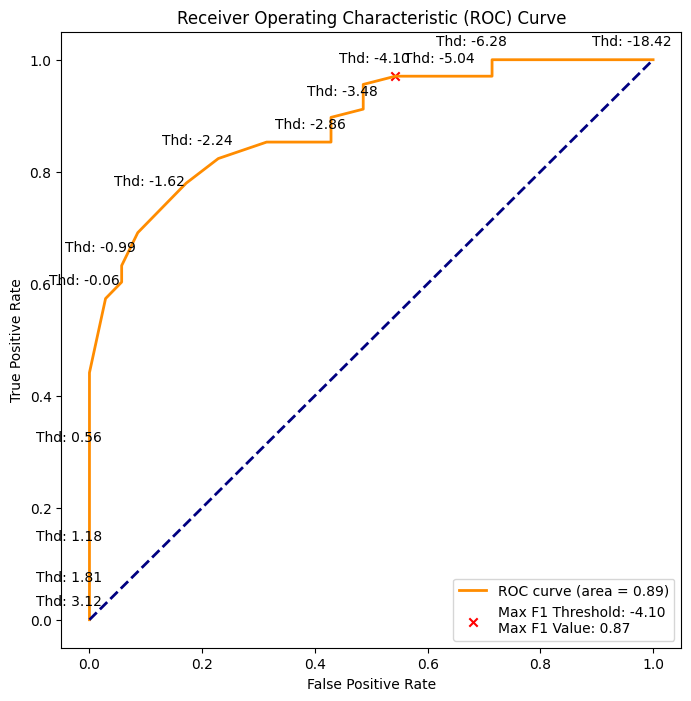

AUC 值：0.89


In [65]:
# 1. 创建 Tot_inflammation_baseline_bin 列
threshold_baseline = -3.12
filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)

# 2. 创建 Tot_inflammation_pred_bin 列
threshold_pred = -3.12
filtered_df['Tot_inflammation_diff_pred_bin'] = np.where(filtered_df['Tot_inflammation_diff_pred'] < threshold_pred, 0, 1)

# 3. 计算混淆矩阵
conf_matrix_baseline = confusion_matrix(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred_bin'])
print("混淆矩阵：\n", conf_matrix_baseline)

# 4. 计算 ROC 曲线和 AUC 值
fpr, tpr, thresholds = roc_curve(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred'])
roc_auc = auc(fpr, tpr)

# 找到最大 F1 值对应的 threshold
f1_values = [f1_score(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred'] > t) for t in thresholds]
max_f1_index = np.argmax(f1_values)
max_f1_threshold = thresholds[max_f1_index]
max_f1_value = f1_values[max_f1_index]


# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# 标注部分点对应的 threshold
for i in range(0, len(thresholds), len(thresholds) // 10):
    plt.annotate(f'Thd: {thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(-15, 10), ha='center')

# 标注最大 F1 值对应的 threshold 和 F1 值
plt.scatter(fpr[max_f1_index], tpr[max_f1_index], c='red', marker='x', label=f'Max F1 Threshold: {max_f1_threshold:.2f}\nMax F1 Value: {max_f1_value:.2f}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 打印 AUC 值
print("AUC 值：{:.2f}".format(roc_auc))

/tmp/ipykernel_194984/428089757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)
/tmp/ipykernel_194984/428089757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred_fold'] = np.nan
/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

(51,) (51,)
slope_train, intercept_train, r_value_train, slope2_train, intercept2_train -0.5570632970139334 1.7662646218106248 -0.6903559801440758 -0.5570632970139335 1.766264621810626
----start training ... ----
(51,) (51,)
confusion_matrix [[ 9  7]
 [ 4 31]]
ROC AUC 值：0.93，最大 F1 值：0.85 (对应的 Threshold：-3.12)
----end training ... ----
(52,) (52,)
slope_test, intercept_test, r_value_test -0.650449605943825 2.879739957643298 -0.7183243888903522
confusion_matrix [[11  8]
 [ 6 27]]
ROC AUC 值：0.84，最大 F1 值：0.79 (对应的 Threshold：-3.12)


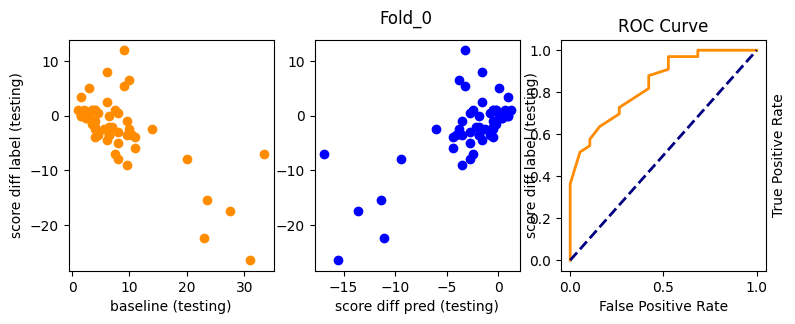

(52,) (52,)
slope_train, intercept_train, r_value_train, slope2_train, intercept2_train -0.650449605943825 2.879739957643298 -0.7183243888903522 -0.6504496059438252 2.8797399576433014
----start training ... ----
(52,) (52,)
confusion_matrix [[11  8]
 [ 4 29]]
ROC AUC 值：0.84，最大 F1 值：0.83 (对应的 Threshold：-3.12)
----end training ... ----
(51,) (51,)
slope_test, intercept_test, r_value_test -0.5570632970139334 1.7662646218106248 -0.6903559801440758
confusion_matrix [[ 9  7]
 [ 3 32]]
ROC AUC 值：0.93，最大 F1 值：0.86 (对应的 Threshold：-3.12)


/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


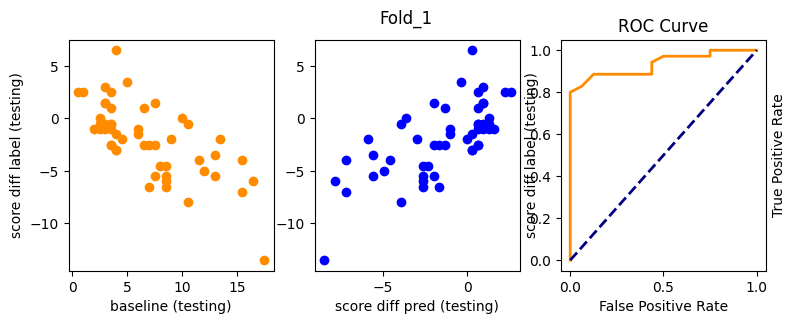

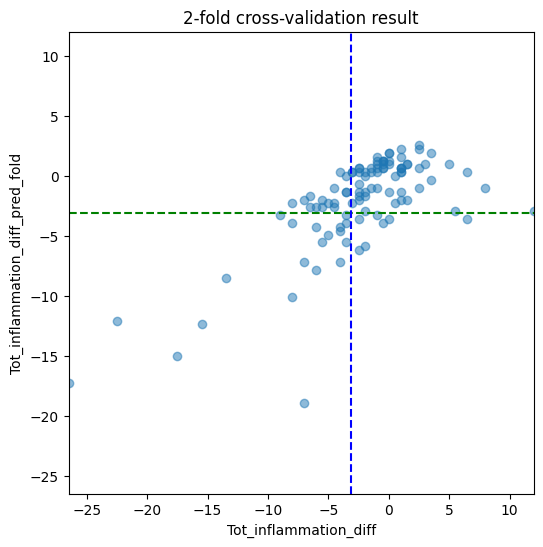


平均 ROC AUC 值：0.89
平均最大 F1 值：0.83


In [72]:
# 创建 Tot_inflammation_baseline_bin 列
threshold_baseline = -3.12
filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)

# 新增一列用于存储预测值
filtered_df['Tot_inflammation_diff_pred_fold'] = np.nan

# 分成4折
folds = 2
kf = KFold(n_splits=folds, shuffle=True, random_state=711)

# 存储每折的结果
roc_auc_list = []
roc_auc_list_train = []
max_f1_values = []
max_f1_values_train = []

for fold, (train_index, test_index) in enumerate(kf.split(filtered_df)):
    train_data = filtered_df.iloc[train_index]
    test_data = filtered_df.iloc[test_index]

    # 训练模型（使用线性回归，你也可以替换为其他模型）
    x_train = train_data['Tot_inflammation_baseline']
    y_train = train_data['Tot_inflammation_diff']
    print(x_train.shape, y_train.shape)
  
    
    model = np.polyfit(x_train.squeeze(), y_train, 1)
    slope, intercept, r_value, p_value, std_err = linregress(x_train, y_train) # 计算线性回归
    slope2 = model[0]
    intercept2 = model[1]
    print('slope_train, intercept_train, r_value_train, slope2_train, intercept2_train', slope, intercept, r_value, slope2, intercept2)

    # 在训练集上进行预测
    print('----start training ... ----')
    print(x_train.shape, y_train.shape)

    y_pred = np.polyval(model, x_train.squeeze())
    # 保存预测值到 result_df 中
    filtered_df.iloc[train_index, filtered_df.columns.get_loc('Tot_inflammation_diff_pred_fold')] = y_pred

    # 计算 ROC 曲线和 AUC 值
    fpr, tpr, thresholds = roc_curve(train_data['Tot_inflammation_diff_bin'], y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_list_train.append(roc_auc)


    matrix = confusion_matrix(train_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    print('confusion_matrix', matrix)
    f1= f1_score(train_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    max_f1_values_train.append(f1)

    # 打印每折的结果
    print("ROC AUC 值：{:.2f}，最大 F1 值：{:.2f} (对应的 Threshold：{:.2f})".format(roc_auc, f1, threshold_baseline))
    print('----end training ... ----')

    
    
    # 在测试集上进行预测

    x_test = test_data[['Tot_inflammation_baseline']].squeeze()
    y_test = test_data['Tot_inflammation_diff']
    
    print(x_test.shape, y_test.shape)
    slope, intercept, r_value, p_value, std_err = linregress(x_test, y_test) # 计算线性回归
    print('slope_test, intercept_test, r_value_test', slope, intercept, r_value)


    y_pred = np.polyval(model, x_test.squeeze())
    # 保存预测值到 result_df 中
    # filtered_df.loc[test_index, 'Tot_inflammation_diff_pred_fold'] = y_pred
    filtered_df.iloc[test_index, filtered_df.columns.get_loc('Tot_inflammation_diff_pred_fold')] = y_pred

    # 计算 ROC 曲线和 AUC 值
    fpr, tpr, thresholds = roc_curve(test_data['Tot_inflammation_diff_bin'], y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    # 找到最大 F1 值对应的 threshold
    # f1_values = [f1_score(test_data['Tot_inflammation_diff_bin'], y_pred > t) for t in thresholds]
    # max_f1_index = np.argmax(f1_values)
    # max_f1_value = f1_values[max_f1_index]
    # max_f1_threshold = thresholds[max_f1_index]
    matrix = confusion_matrix(test_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    print('confusion_matrix', matrix)

    f1= f1_score(test_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    max_f1_values.append(f1)

    # 打印每折的结果
    print("ROC AUC 值：{:.2f}，最大 F1 值：{:.2f} (对应的 Threshold：{:.2f})".format(roc_auc, f1, threshold_baseline))
    
    
    
        # 绘制 预测散点图
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
    ax1.scatter(x_test, y_test, color='darkorange')
    ax1.set_xlabel('baseline (testing)')
    ax1.set_ylabel('score diff label (testing)')
    ax2.scatter(y_pred, y_test, color='blue')
    ax2.yaxis.set_label_position('right')
    ax2.set_ylabel('score diff label (testing)')
    ax2.set_xlabel('score diff pred (testing)')  
  
    # plt.show()
    
    # 绘制 ROC 曲线
    # plt.figure(figsize=(2, 2))
    ax3.plot(fpr, tpr, color='darkorange', lw=2, label='(area = {:.2f})'.format(roc_auc))

    ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax3.set_xlabel('False Positive Rate')
    ax3.yaxis.set_label_position('right')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve')
    # plt.legend(loc='lower right')
    plt.suptitle(f'Fold_{fold}')
    plt.show()

# 绘制散点图和回归线
plt.figure(figsize=(6, 6))
plt.scatter(filtered_df['Tot_inflammation_diff'], filtered_df['Tot_inflammation_diff_pred_fold'], label='实际值', alpha=0.5)
# 绘制横线y=-3.12
plt.axhline(y=threshold_baseline, color='green', linestyle='--', label='y = -3.12')

# 绘制竖线x=-3.12
plt.axvline(x=threshold_baseline, color='blue', linestyle='--', label='x = -3.12')


# plt.scatter(filtered_df['Tot_inflammation_baseline'], filtered_df['Tot_inflammation_diff_pred_fold'], label='预测值', alpha=0.5)
# plt.plot(filtered_df['Tot_inflammation_baseline'], filtered_df['Tot_inflammation_diff_pred_fold'], label='回归线', color='red', linewidth=2)
plt.xlabel('Tot_inflammation_diff')
plt.ylabel('Tot_inflammation_diff_pred_fold')
plt.title(f'{folds}-fold cross-validation result')
# plt.legend()
# 设置 x 和 y 轴上下限相同
max_limit = max(filtered_df['Tot_inflammation_diff'].max(), filtered_df['Tot_inflammation_diff_pred_fold'].max())
min_limit = min(filtered_df['Tot_inflammation_diff'].min(), filtered_df['Tot_inflammation_diff_pred_fold'].min())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)
plt.show()

# 打印平均结果
print("\n平均 ROC AUC 值：{:.2f}".format(np.mean(roc_auc_list)))
print("平均最大 F1 值：{:.2f}".format(np.mean(max_f1_values)))

65

# This part is for PLA

In [46]:
filtered_df = result_df[~result_df['ID'].isin(split103_id)]


In [47]:
pla_df

,ID,ERO_MCP2.gem_TOT_baseline,ERO_MCP3.gem_TOT_baseline,ERO_MCP4.gem_TOT_baseline,ERO_MCP5.gem_TOT_baseline,ERO_MTP1.gem_TOT_baseline,ERO_MTP2.gem_TOT_baseline,ERO_MTP3.gem_TOT_baseline,ERO_MTP4.gem_TOT_baseline,ERO_MTP5.gem_TOT_baseline,...,BME_MTP3.gem_TOT_diff,BME_MTP4.gem_TOT_diff,BME_MTP5.gem_TOT_diff,Tot_BME_diff,Tot_SYN_diff,Tot_TS_diff,total_ero_diff,Tot_inflammation_diff,tot_ramris_diff,Tot_inflammation_diff_pred
0,1,1.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,1.0,-3.0,0.0,-3.0,-3.0,-1.067080
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-2.0,0.5,0.0,1.0,-1.5,-0.5,0.666401
4,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.5,0.5,0.0,4.0,-1.0,3.0,-0.585557
5,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.5,0.0,1.0,2.5,3.5,0.666401
9,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,3.0,-1.5,-0.5,2.0,1.5,0.184879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.5,0.5,-0.5,0.0,-0.5,0.955315
189,470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-0.5,0.0,1.0,-1.5,-0.5,0.666401
190,471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.666401
191,477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,3.0,0.0,5.0,5.0,0.088574


slope, intercept, r_value, p_value, std_err -0.19260901668197794 1.2442282760811527 -0.17492531879072323 0.09353062519484909 0.1136462226463815


/tmp/ipykernel_194984/4059646181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred'] = slope * x + intercept  # 计算预测值


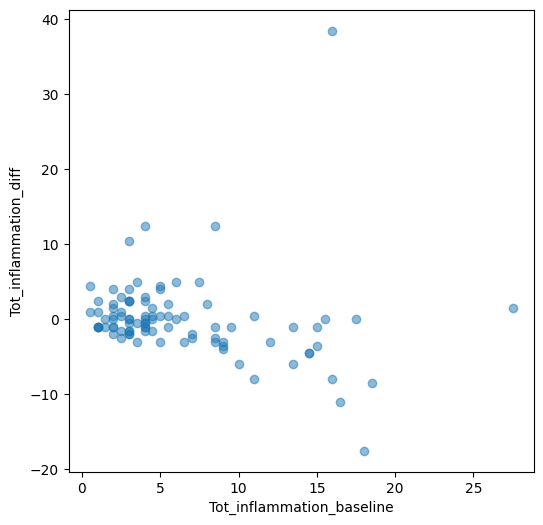

In [49]:
# 提取 x 和 y 列
x = filtered_df['Tot_inflammation_baseline']
y = filtered_df['Tot_inflammation_diff']
slope, intercept, r_value, p_value, std_err = linregress(x, y) # 计算线性回归
filtered_df['Tot_inflammation_diff_pred'] = slope * x + intercept  # 计算预测值
R = np.corrcoef(x, y)[0, 1]  # 计算皮尔逊相关系数
print('slope, intercept, r_value, p_value, std_err', slope, intercept, r_value, p_value, std_err)
# 绘制散点图和回归线
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Tot_inflammation_baseline')
plt.ylabel('Tot_inflammation_diff')

plt.show()

/tmp/ipykernel_194984/2768234099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)
/tmp/ipykernel_194984/2768234099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred_bin'] = np.where(filtered_df['Tot_inflammation_diff_pred'] < threshold_pred, 0, 1)


混淆矩阵：
 [[ 0 12]
 [ 1 80]]


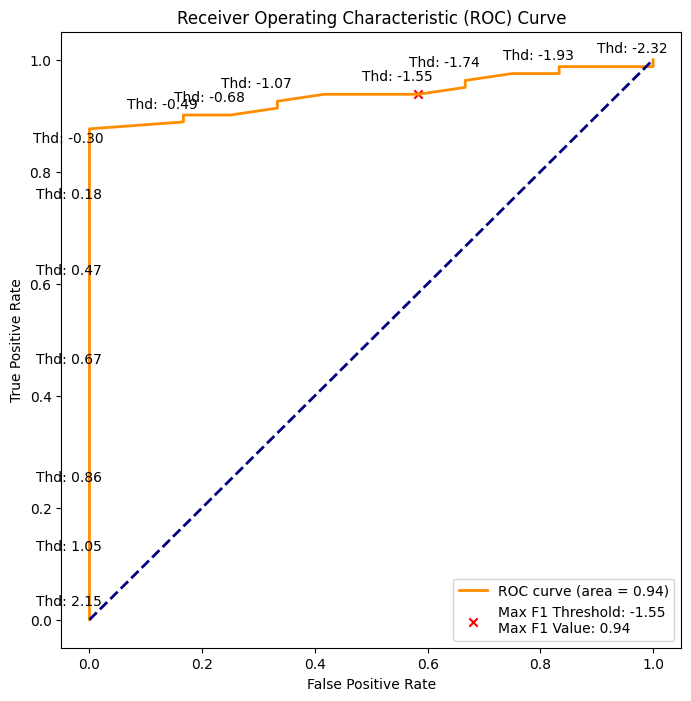

AUC 值：0.94


In [50]:
# 1. 创建 Tot_inflammation_baseline_bin 列
threshold_baseline = -3.12
filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)

# 2. 创建 Tot_inflammation_pred_bin 列
threshold_pred = -3.12
filtered_df['Tot_inflammation_diff_pred_bin'] = np.where(filtered_df['Tot_inflammation_diff_pred'] < threshold_pred, 0, 1)

# 3. 计算混淆矩阵
conf_matrix_baseline = confusion_matrix(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred_bin'])
print("混淆矩阵：\n", conf_matrix_baseline)

# 4. 计算 ROC 曲线和 AUC 值
fpr, tpr, thresholds = roc_curve(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred'])
roc_auc = auc(fpr, tpr)

# 找到最大 F1 值对应的 threshold
f1_values = [f1_score(filtered_df['Tot_inflammation_diff_bin'], filtered_df['Tot_inflammation_diff_pred'] > t) for t in thresholds]
max_f1_index = np.argmax(f1_values)
max_f1_threshold = thresholds[max_f1_index]
max_f1_value = f1_values[max_f1_index]


# 绘制 ROC 曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# 标注部分点对应的 threshold
for i in range(0, len(thresholds), len(thresholds) // 10):
    plt.annotate(f'Thd: {thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(-15, 10), ha='center')

# 标注最大 F1 值对应的 threshold 和 F1 值
plt.scatter(fpr[max_f1_index], tpr[max_f1_index], c='red', marker='x', label=f'Max F1 Threshold: {max_f1_threshold:.2f}\nMax F1 Value: {max_f1_value:.2f}')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 打印 AUC 值
print("AUC 值：{:.2f}".format(roc_auc))

/tmp/ipykernel_194984/2565890604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)
/tmp/ipykernel_194984/2565890604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Tot_inflammation_diff_pred_fold'] = np.nan
/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

(46,) (46,)
slope_train, intercept_train, r_value_train, slope2_train, intercept2_train -0.025087517067423265 0.5334521495382758 -0.018321225508131603 -0.025087517067423185 0.5334521495382755
----start training ... ----
(46,) (46,)
confusion_matrix [[ 0  5]
 [ 0 41]]
ROC AUC 值：0.94，最大 F1 值：0.94 (对应的 Threshold：-3.12)
----end training ... ----
(47,) (47,)
slope_test, intercept_test, r_value_test -0.3766590748448912 1.9633236472158955 -0.5233803105753911
confusion_matrix [[ 0  7]
 [ 0 40]]


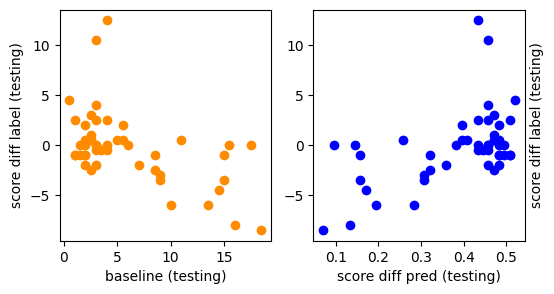

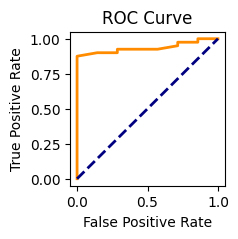

(47,) (47,)
slope_train, intercept_train, r_value_train, slope2_train, intercept2_train -0.3766590748448912 1.9633236472158955 -0.5233803105753911 -0.376659074844891 1.9633236472158935
----start training ... ----
(47,) (47,)
confusion_matrix [[ 5  2]
 [ 3 37]]
ROC AUC 值：0.94，最大 F1 值：0.94 (对应的 Threshold：-3.12)
----end training ... ----
(46,) (46,)
slope_test, intercept_test, r_value_test -0.025087517067423265 0.5334521495382758 -0.018321225508131603
confusion_matrix [[ 3  2]
 [ 3 38]]


/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home/jjia/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


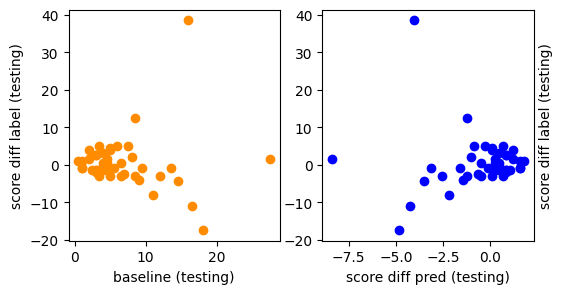

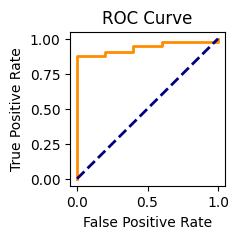

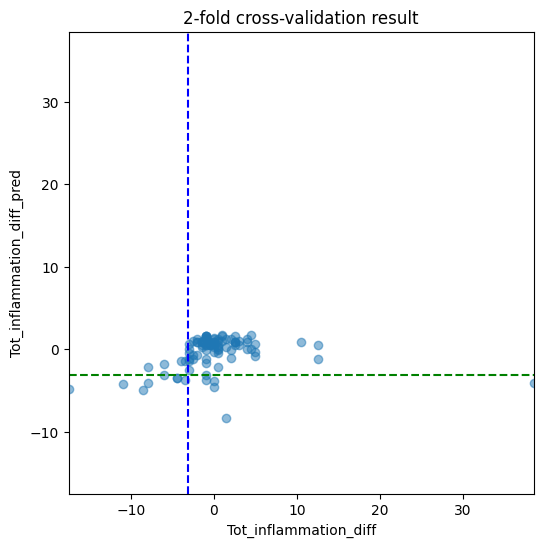


平均 ROC AUC 值：0.94
平均最大 F1 值：0.93


In [60]:
# 创建 Tot_inflammation_baseline_bin 列
threshold_baseline = -3.12
filtered_df['Tot_inflammation_diff_bin'] = np.where(filtered_df['Tot_inflammation_diff'] < threshold_baseline, 0, 1)

# 新增一列用于存储预测值
filtered_df['Tot_inflammation_diff_pred_fold'] = np.nan

# 分成4折
folds = 2
kf = KFold(n_splits=folds, shuffle=True, random_state=711)

# 存储每折的结果
roc_auc_list = []
roc_auc_list_train = []
max_f1_values = []
max_f1_values_train = []

for train_index, test_index in kf.split(filtered_df):
    train_data = filtered_df.iloc[train_index]
    test_data = filtered_df.iloc[test_index]

    # 训练模型（使用线性回归，你也可以替换为其他模型）
    x_train = train_data['Tot_inflammation_baseline']
    y_train = train_data['Tot_inflammation_diff']
    print(x_train.shape, y_train.shape)
  
    
    model = np.polyfit(x_train.squeeze(), y_train, 1)
    slope, intercept, r_value, p_value, std_err = linregress(x_train, y_train) # 计算线性回归
    slope2 = model[0]
    intercept2 = model[1]
    print('slope_train, intercept_train, r_value_train, slope2_train, intercept2_train', slope, intercept, r_value, slope2, intercept2)

    # 在训练集上进行预测
    print('----start training ... ----')
    print(x_train.shape, y_train.shape)

    y_pred = np.polyval(model, x_train.squeeze())
    # 保存预测值到 result_df 中
    filtered_df.iloc[train_index, filtered_df.columns.get_loc('Tot_inflammation_diff_pred_fold')] = y_pred

    # 计算 ROC 曲线和 AUC 值
    fpr, tpr, thresholds = roc_curve(train_data['Tot_inflammation_diff_bin'], y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_list_train.append(roc_auc)


    matrix = confusion_matrix(train_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    print('confusion_matrix', matrix)
    f1= f1_score(train_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    max_f1_values_train.append(f1)

    # 打印每折的结果
    print("ROC AUC 值：{:.2f}，最大 F1 值：{:.2f} (对应的 Threshold：{:.2f})".format(roc_auc, f1, threshold_baseline))
    print('----end training ... ----')

    
    
    # 在测试集上进行预测

    x_test = test_data[['Tot_inflammation_baseline']].squeeze()
    y_test = test_data['Tot_inflammation_diff']
    
    print(x_test.shape, y_test.shape)
    slope, intercept, r_value, p_value, std_err = linregress(x_test, y_test) # 计算线性回归
    print('slope_test, intercept_test, r_value_test', slope, intercept, r_value)


    y_pred = np.polyval(model, x_test.squeeze())
    # 保存预测值到 result_df 中
    # filtered_df.loc[test_index, 'Tot_inflammation_diff_pred_fold'] = y_pred
    filtered_df.iloc[test_index, filtered_df.columns.get_loc('Tot_inflammation_diff_pred_fold')] = y_pred

    # 计算 ROC 曲线和 AUC 值
    fpr, tpr, thresholds = roc_curve(test_data['Tot_inflammation_diff_bin'], y_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    # 找到最大 F1 值对应的 threshold
    # f1_values = [f1_score(test_data['Tot_inflammation_diff_bin'], y_pred > t) for t in thresholds]
    # max_f1_index = np.argmax(f1_values)
    # max_f1_value = f1_values[max_f1_index]
    # max_f1_threshold = thresholds[max_f1_index]
    matrix = confusion_matrix(test_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    print('confusion_matrix', matrix)

    f1= f1_score(test_data['Tot_inflammation_diff_bin'], y_pred > threshold_baseline)
    max_f1_values.append(f1)

    # 打印每折的结果
   
    # 绘制 预测散点图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    ax1.scatter(x_test, y_test, color='darkorange')
    ax1.set_xlabel('baseline (testing)')
    ax1.set_ylabel('score diff label (testing)')
    ax2.scatter(y_pred, y_test, color='blue')
    ax2.yaxis.set_label_position('right')
    ax2.set_ylabel('score diff label (testing)')
    ax2.set_xlabel('score diff pred (testing)')    
    plt.show()
    
    # 绘制 ROC 曲线
    plt.figure(figsize=(2, 2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='(area = {:.2f})'.format(roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # plt.legend(loc='lower right')
    plt.show()

# 绘制散点图和回归线
plt.figure(figsize=(6, 6))
plt.scatter(filtered_df['Tot_inflammation_diff'], filtered_df['Tot_inflammation_diff_pred_fold'], label='实际值', alpha=0.5)
# 绘制横线y=-3.12
plt.axhline(y=threshold_baseline, color='green', linestyle='--', label='y = -3.12')

# 绘制竖线x=-3.12
plt.axvline(x=threshold_baseline, color='blue', linestyle='--', label='x = -3.12')


# plt.scatter(filtered_df['Tot_inflammation_baseline'], filtered_df['Tot_inflammation_diff_pred_fold'], label='预测值', alpha=0.5)
# plt.plot(filtered_df['Tot_inflammation_baseline'], filtered_df['Tot_inflammation_diff_pred_fold'], label='回归线', color='red', linewidth=2)
plt.xlabel('Tot_inflammation_diff')
plt.ylabel('Tot_inflammation_diff_pred')
plt.title(f'{folds}-fold cross-validation result')
# plt.legend()
# 设置 x 和 y 轴上下限相同
max_limit = max(filtered_df['Tot_inflammation_diff'].max(), filtered_df['Tot_inflammation_diff_pred_fold'].max())
min_limit = min(filtered_df['Tot_inflammation_diff'].min(), filtered_df['Tot_inflammation_diff_pred_fold'].min())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)
plt.show()

# 打印平均结果
print("\n平均 ROC AUC 值：{:.2f}".format(np.mean(roc_auc_list)))
print("平均最大 F1 值：{:.2f}".format(np.mean(max_f1_values)))